# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [2]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [2]:
# Install requirements
!python -m pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 MB 16.9 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 1.6 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 339.2/339.2 kB 4.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.0/215.0 kB 2.2 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 16.9 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.4/257.4 kB 3.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 26.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 1.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.8/162.8 kB 2.0 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.3/383.3 kB 3.2 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 26.2 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
pip install --upgrade jupyter ipywidgets

Note: you may need to restart the kernel to use updated packages.


## Imports

In [2]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import numpy as np

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [37]:
# Define transforms
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.2,), (0.4,))])

# Create training set and define training dataloader
training_data = datasets.MNIST(root="data", train=True, download=True, transform=transform)
train_loader = DataLoader(training_data, batch_size=128, shuffle=True)

# Create test set and define test dataloader
test_data = datasets.MNIST(root="data", train=False, download=True, transform=transform)
test_loader = DataLoader(test_data, batch_size=128, shuffle=True)

## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

- ToTensor is used in order to convert the input images to pytorch tensors that can be passed to neural networks set up using pytorch. 

- Normalize is used to normalize the values - have a mean of zero and standard deviation of one - which improves the efficiency and speed of training and leads to better genralization.

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [29]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

6


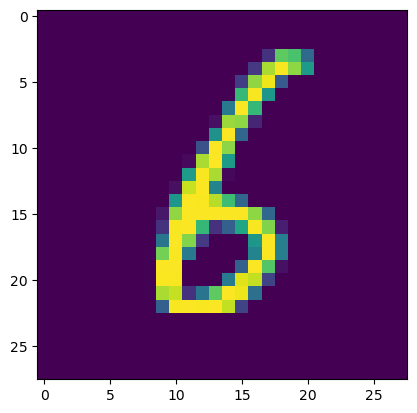

5


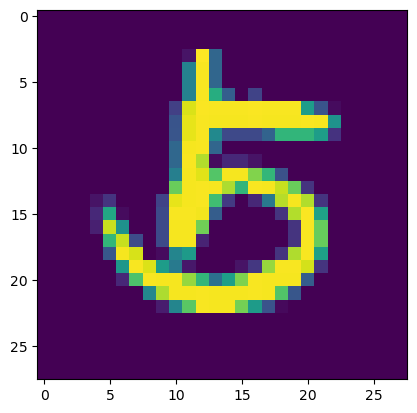

9


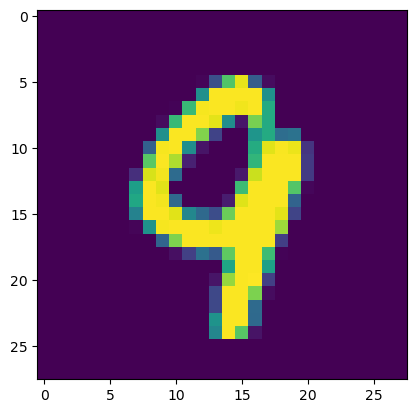

1


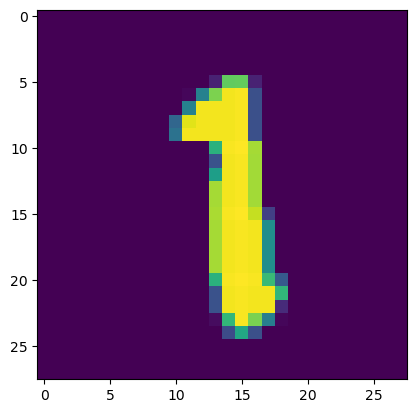

2


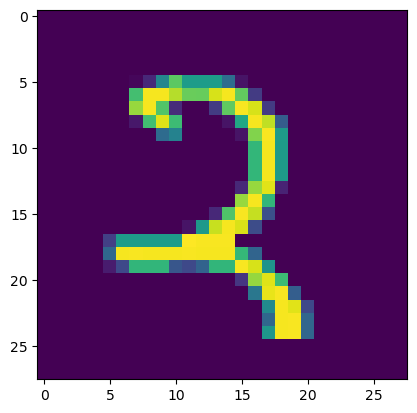

In [30]:
# Explore data
show5(train_loader)

8


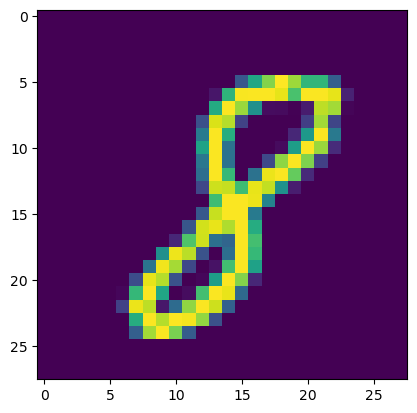

2


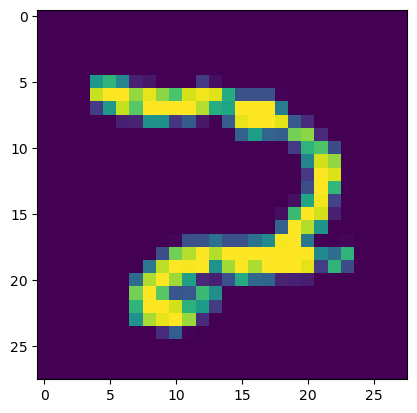

6


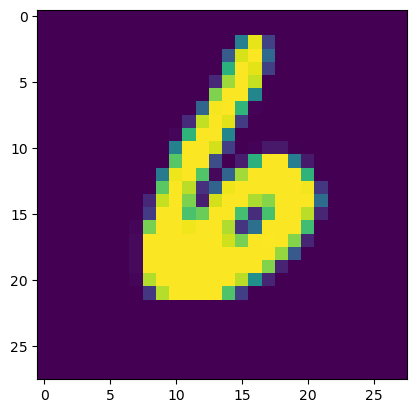

6


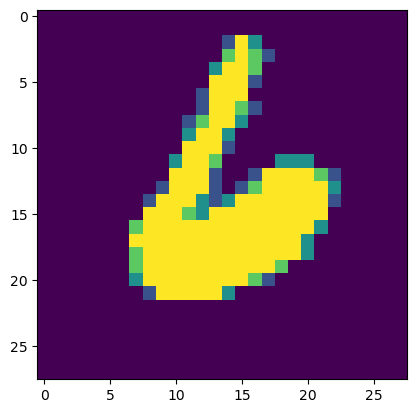

9


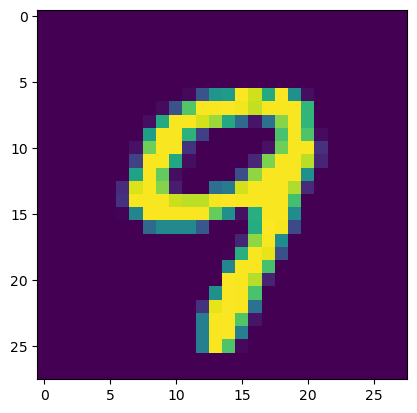

In [31]:
show5(test_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [38]:
# Define the class for your neural network
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.activation = F.relu
        self.fc1 = nn.Linear(28 * 28, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 10)

    def forward(self, x):
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate the model
net = Net()
net.to(device)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=10, bias=True)
)

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [39]:
# Choose an optimizer
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Choose a loss function
criterion = nn.CrossEntropyLoss()

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [40]:
num_epochs = 10

train_loss_history = list()

for epoch in range(num_epochs):
    net.train()
    train_loss = 0.0
    train_correct = 0
    total_samples = 0
    
    for i, data in enumerate(train_loader):
        inputs, labels = data

        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs, 1)
        train_correct += torch.sum(preds == labels).item()
        train_loss += loss.item()
        total_samples += labels.size(0)

    epoch_accuracy = train_correct / total_samples
    epoch_loss = train_loss / len(train_loader)

    train_loss_history.append(epoch_loss)

    print(f'Epoch {epoch + 1} training accuracy: {epoch_accuracy * 100:.2f}% training loss: {epoch_loss:.5f}')

Epoch 1 training accuracy: 87.18% training loss: 0.44172
Epoch 2 training accuracy: 94.06% training loss: 0.19895
Epoch 3 training accuracy: 95.70% training loss: 0.14560
Epoch 4 training accuracy: 96.49% training loss: 0.11852
Epoch 5 training accuracy: 96.91% training loss: 0.10083
Epoch 6 training accuracy: 97.31% training loss: 0.08712
Epoch 7 training accuracy: 97.68% training loss: 0.07531
Epoch 8 training accuracy: 97.98% training loss: 0.06525
Epoch 9 training accuracy: 98.14% training loss: 0.06058
Epoch 10 training accuracy: 98.28% training loss: 0.05386


Plot the training loss (and validation loss/accuracy, if recorded).

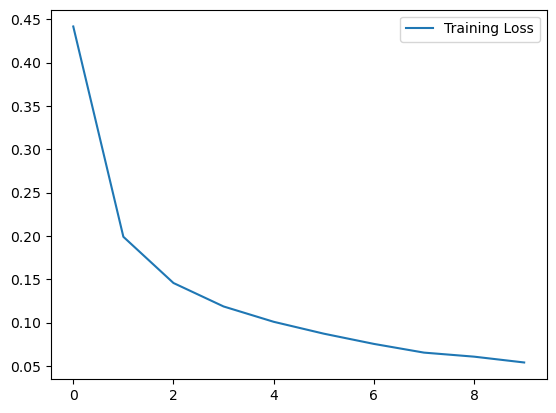

In [41]:
# Plot the training and validation loss history
plt.plot(train_loss_history, label="Training Loss")
plt.legend()
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [44]:
net.eval()  # Set the network to evaluation mode

test_loss = 0.0
test_correct = 0
total_samples = 0

# Disable gradient calculation during testing
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = net(inputs)
        loss = criterion(outputs, labels)

        _, preds = torch.max(outputs, 1)
        test_correct += torch.sum(preds == labels).item()
        test_loss += loss.item()
        total_samples += labels.size(0)

# Calculate accuracy after processing all test batches
test_accuracy = test_correct / total_samples
# Calculate average loss across all test batches
test_loss /= len(test_loader)

print(f'Test accuracy: {test_accuracy * 100:.2f}% Test loss: {test_loss:.5f}')

Test accuracy: 97.47% Test loss: 0.09054


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [50]:
# Define transforms
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.15,), (0.35,))])

# Create training set and define training dataloader
training_data = datasets.MNIST(root="data", train=True, download=True, transform=transform)
train_loader = DataLoader(training_data, batch_size=128, shuffle=True)

# Create test set and define test dataloader
test_data = datasets.MNIST(root="data", train=False, download=True, transform=transform)
test_loader = DataLoader(test_data, batch_size=128, shuffle=True)

# Define the class for your neural network
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.activation = F.relu
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 10)

    def forward(self, x):
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.activation(self.fc3(x))
        x = self.fc4(x)
        return x

# Instantiate the model
net = Net()
net.to(device)

# Choose an optimizer
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Choose a loss function
criterion = nn.CrossEntropyLoss()

num_epochs = 12

train_loss_history = list()

for epoch in range(num_epochs):
    net.train()
    train_loss = 0.0
    train_correct = 0
    total_samples = 0
    
    for i, data in enumerate(train_loader):
        inputs, labels = data

        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs, 1)
        train_correct += torch.sum(preds == labels).item()
        train_loss += loss.item()
        total_samples += labels.size(0)

    epoch_accuracy = train_correct / total_samples
    epoch_loss = train_loss / len(train_loader)

    train_loss_history.append(epoch_loss)

    print(f'Epoch {epoch + 1} training accuracy: {epoch_accuracy * 100:.2f}% training loss: {epoch_loss:.5f}')

Epoch 1 training accuracy: 88.44% training loss: 0.38445
Epoch 2 training accuracy: 95.66% training loss: 0.14368
Epoch 3 training accuracy: 96.92% training loss: 0.10090
Epoch 4 training accuracy: 97.57% training loss: 0.07794
Epoch 5 training accuracy: 98.08% training loss: 0.06273
Epoch 6 training accuracy: 98.33% training loss: 0.05264
Epoch 7 training accuracy: 98.61% training loss: 0.04414
Epoch 8 training accuracy: 98.72% training loss: 0.03850
Epoch 9 training accuracy: 98.97% training loss: 0.03216
Epoch 10 training accuracy: 99.12% training loss: 0.02787
Epoch 11 training accuracy: 99.18% training loss: 0.02528
Epoch 12 training accuracy: 99.31% training loss: 0.02134


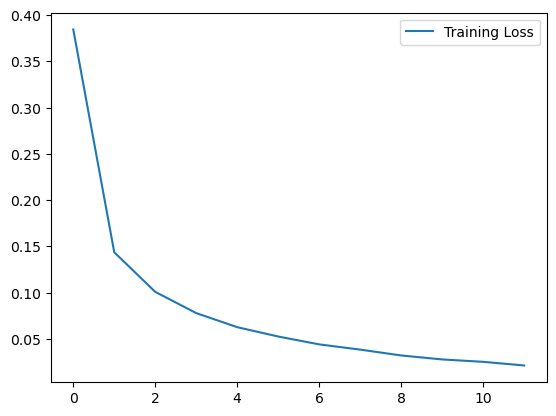

In [51]:
# Plot the training and validation loss history
plt.plot(train_loss_history, label="Training Loss")
plt.legend()
plt.show()

In [52]:
net.eval()  # Set the network to evaluation mode

test_loss = 0.0
test_correct = 0
total_samples = 0

# Disable gradient calculation during testing
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = net(inputs)
        loss = criterion(outputs, labels)

        _, preds = torch.max(outputs, 1)
        test_correct += torch.sum(preds == labels).item()
        test_loss += loss.item()
        total_samples += labels.size(0)

# Calculate accuracy after processing all test batches
test_accuracy = test_correct / total_samples
# Calculate average loss across all test batches
test_loss /= len(test_loader)

print(f'Test accuracy: {test_accuracy * 100:.2f}% Test loss: {test_loss:.5f}')

Test accuracy: 97.53% Test loss: 0.09473


## Saving your model
Using `torch.save`, save your model for future loading.

In [55]:
torch.save(net, 'model.pth')